In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")

In [5]:
des = description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

In [6]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [7]:
payback = app_train.loc[ID_Payback]
default = app_train.loc[ID_Default]

In [8]:
mets = ["A_AMT_INCOME_TOTAL", "A_AMT_CREDIT", "A_AMT_ANNUITY", "A_REGION_POPULATION_RELATIVE", "A_DAYS_BIRTH", "A_DAYS_EMPLOYED", "A_DAYS_REGISTRATION", "A_DAYS_ID_PUBLISH", "A_EXT_SOURCE_1", "A_EXT_SOURCE_2", "A_EXT_SOURCE_3", "A_BASEMENTAREA_AVG", "A_YEARS_BEGINEXPLUATATION_AVG", "A_LANDAREA_AVG", "A_NONLIVINGAREA_AVG", "A_TOTALAREA_MODE", "A_CREDIT/INCOME"]

In [9]:
app_train[mets].head()

,A_AMT_INCOME_TOTAL,A_AMT_CREDIT,A_AMT_ANNUITY,A_REGION_POPULATION_RELATIVE,A_DAYS_BIRTH,A_DAYS_EMPLOYED,A_DAYS_REGISTRATION,A_DAYS_ID_PUBLISH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_EXT_SOURCE_3,A_BASEMENTAREA_AVG,A_YEARS_BEGINEXPLUATATION_AVG,A_LANDAREA_AVG,A_NONLIVINGAREA_AVG,A_TOTALAREA_MODE,A_CREDIT/INCOME
SK_ID_CURR,,,,,,,,,,,,,,,,,
100002,202500.0,406597.5,24700.5,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376,0.0369,0.9722,0.0369,0.0000,0.0149,2.007889
100003,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,-1186.0,-291,0.311267,0.622246,NaN,0.0529,0.9851,0.0130,0.0098,0.0714,4.790750
100004,67500.0,135000.0,6750.0,0.010032,-19046,-225,-4260.0,-2531,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,2.000000
100006,135000.0,312682.5,29686.5,0.008019,-19005,-3039,-9833.0,-2437,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,2.316167
100007,121500.0,513000.0,21865.5,0.028663,-19932,-3038,-4311.0,-3458,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,4.222222


### A_AMT_INCOME_TOTAL

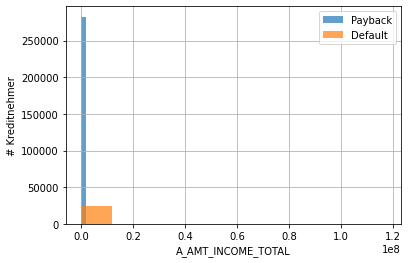

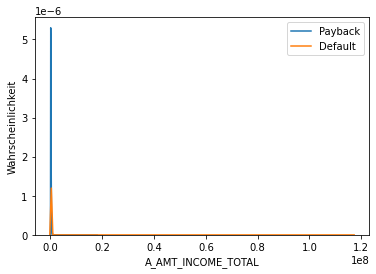

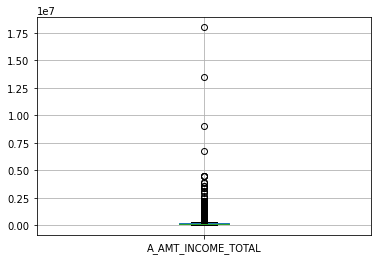

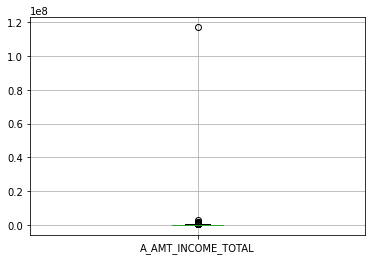

### A_AMT_CREDIT

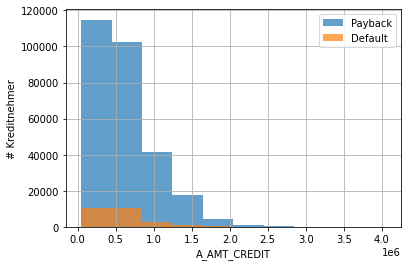

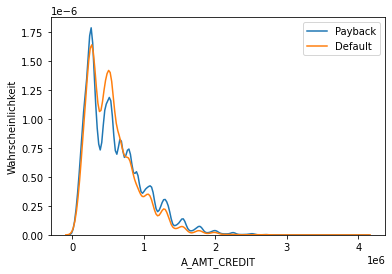

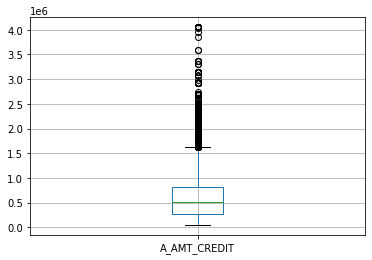

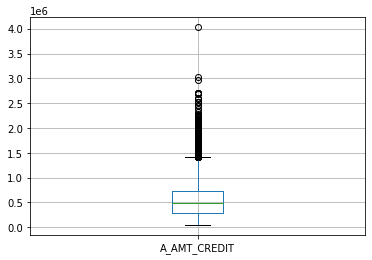

### A_AMT_ANNUITY

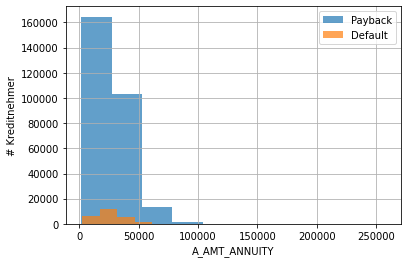

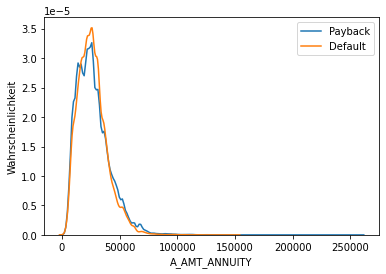

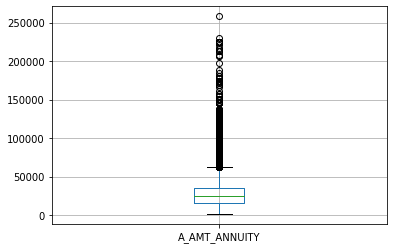

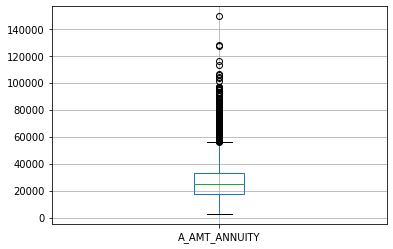

### A_REGION_POPULATION_RELATIVE

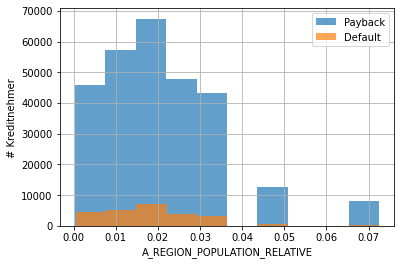

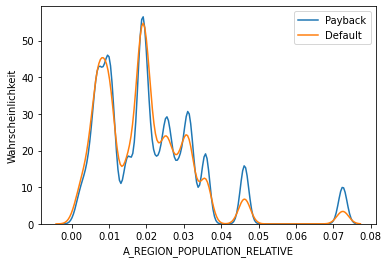

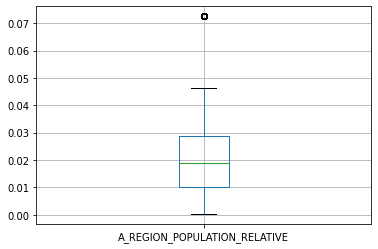

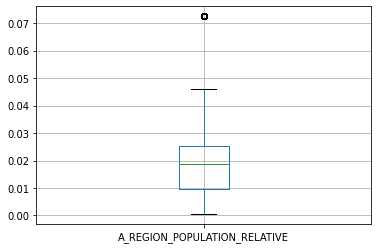

### A_DAYS_BIRTH

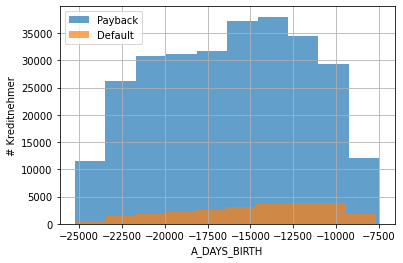

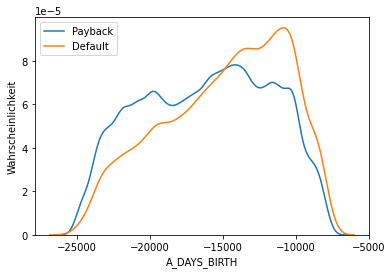

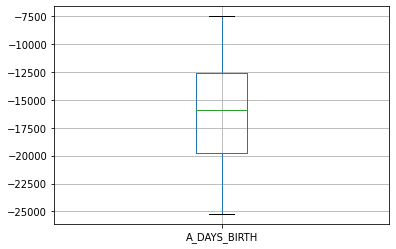

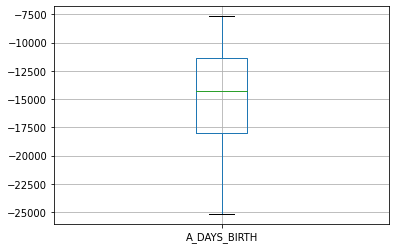

### A_DAYS_EMPLOYED

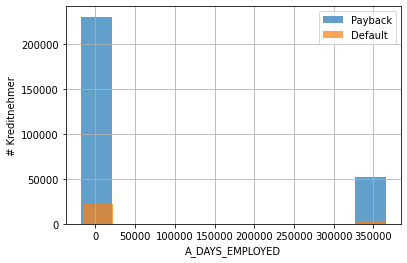

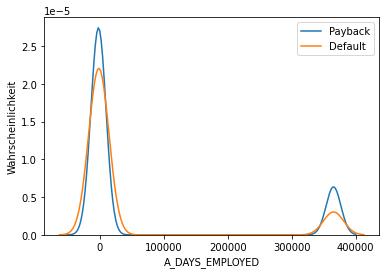

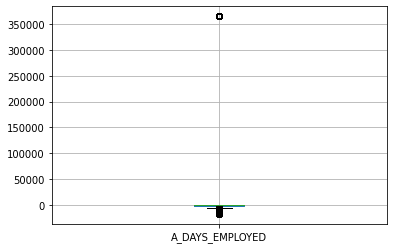

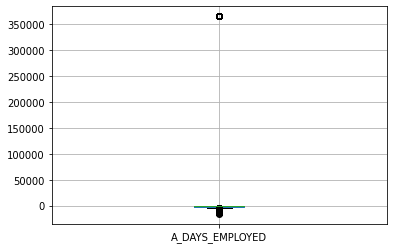

### A_DAYS_REGISTRATION

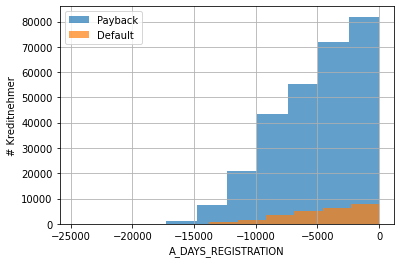

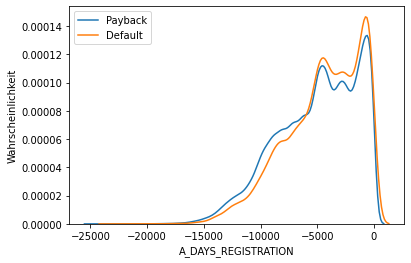

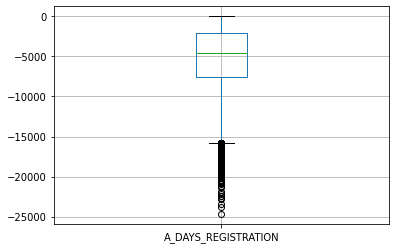

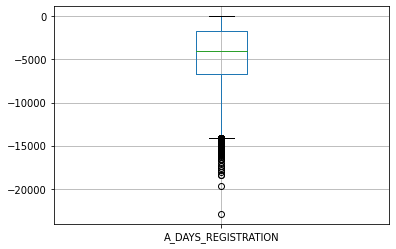

### A_DAYS_ID_PUBLISH

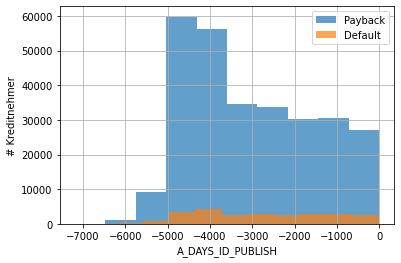

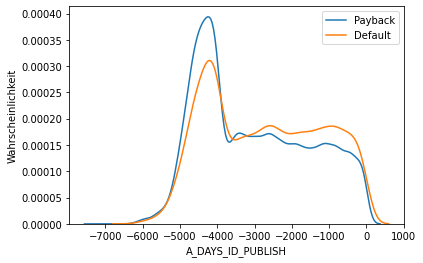

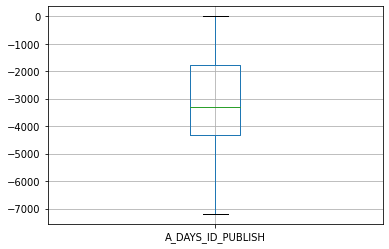

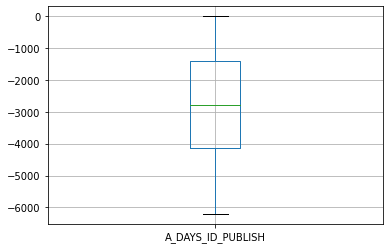

### A_EXT_SOURCE_1

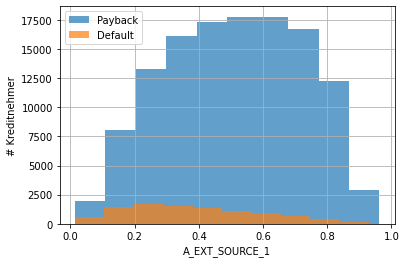

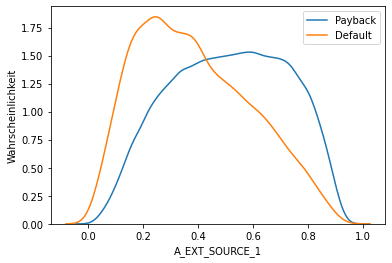

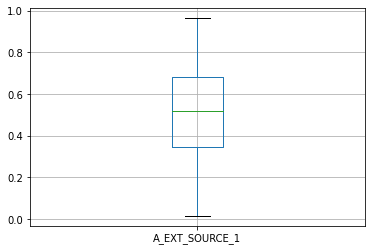

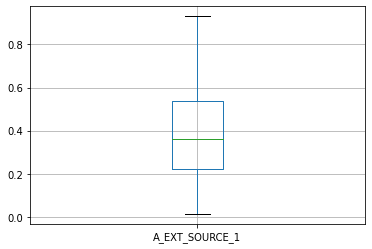

### A_EXT_SOURCE_2

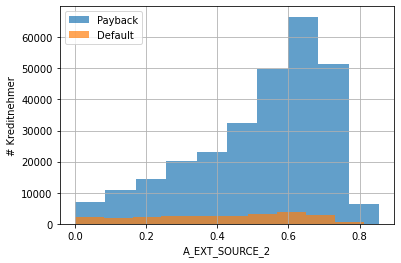

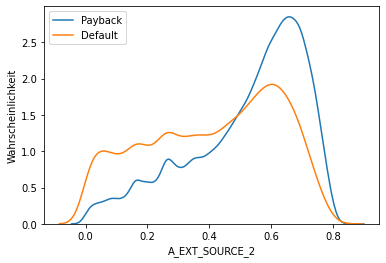

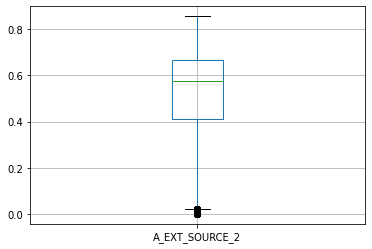

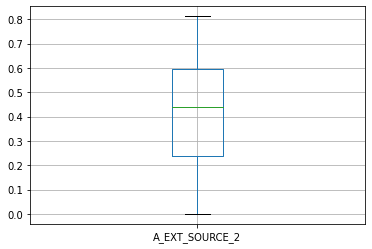

### A_EXT_SOURCE_3

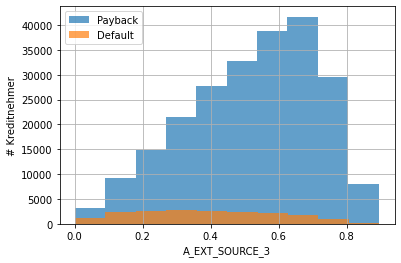

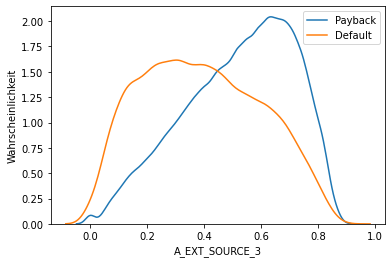

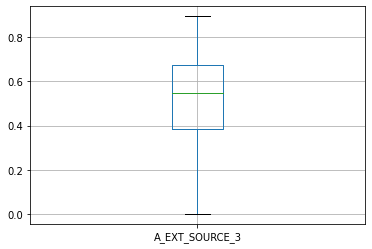

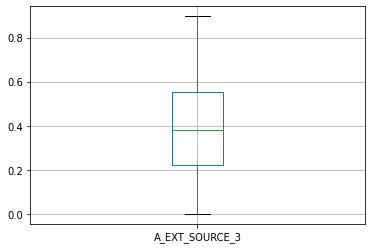

### A_BASEMENTAREA_AVG

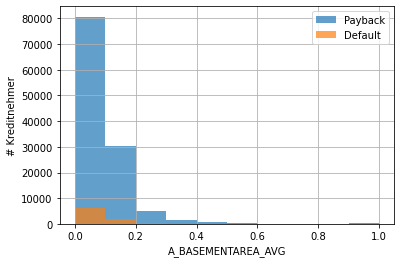

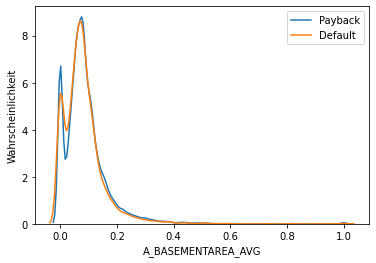

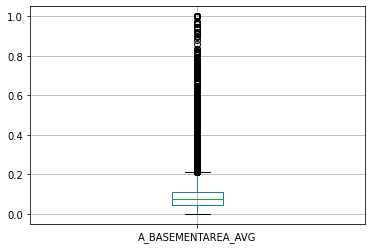

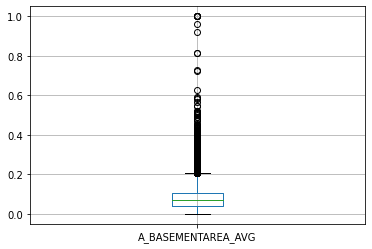

### A_YEARS_BEGINEXPLUATATION_AVG

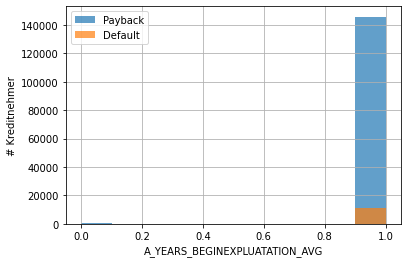

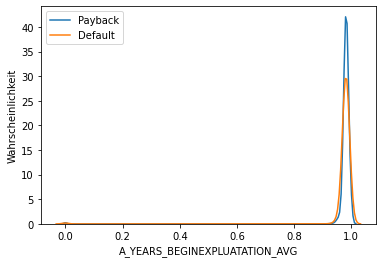

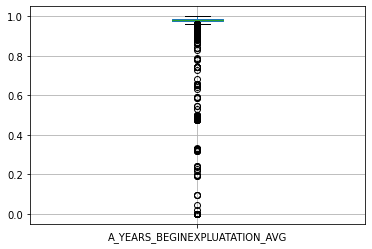

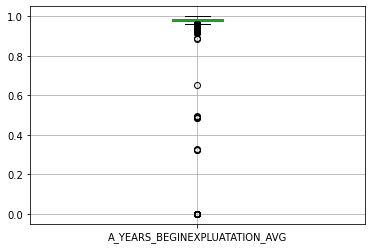

### A_LANDAREA_AVG

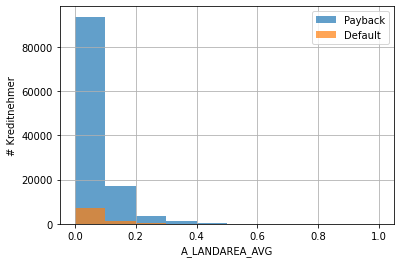

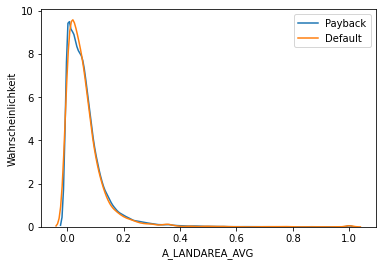

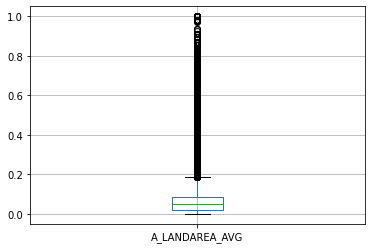

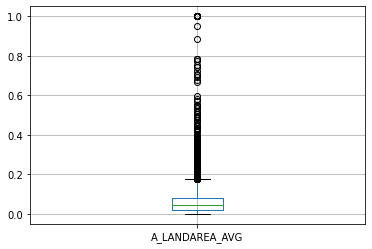

### A_NONLIVINGAREA_AVG

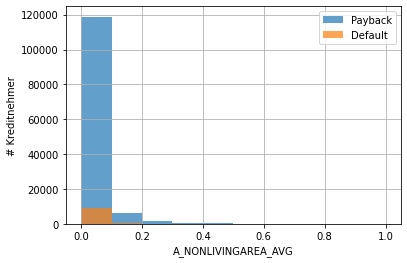

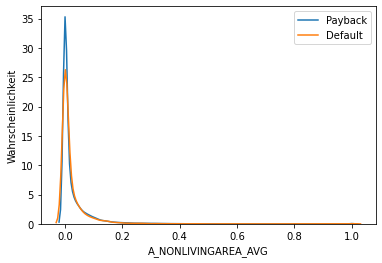

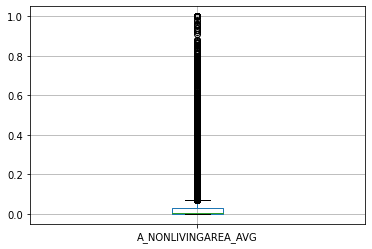

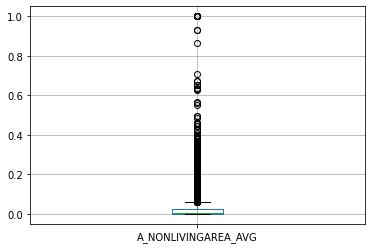

### A_TOTALAREA_MODE

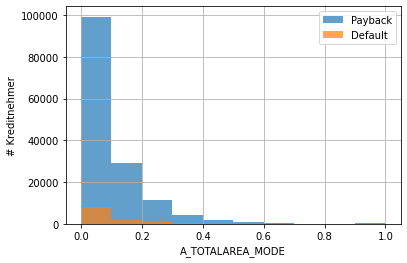

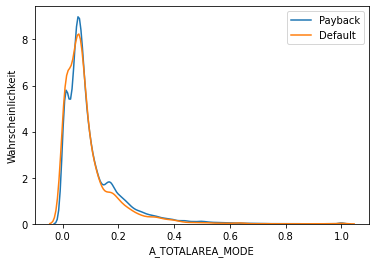

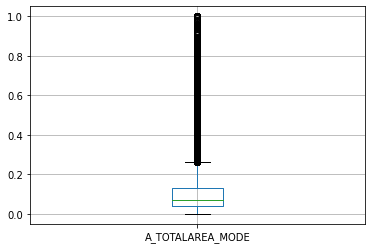

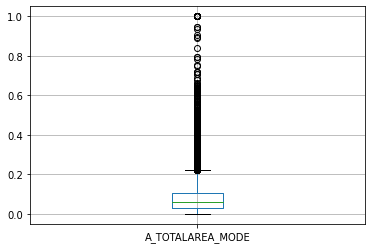

### A_CREDIT/INCOME

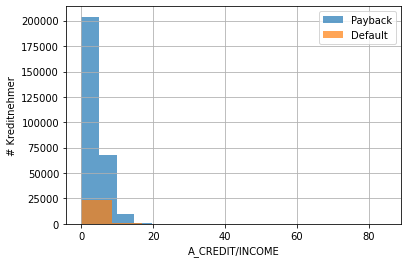

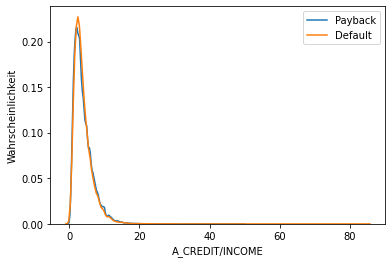

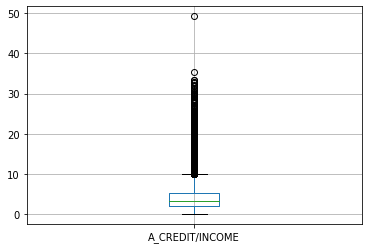

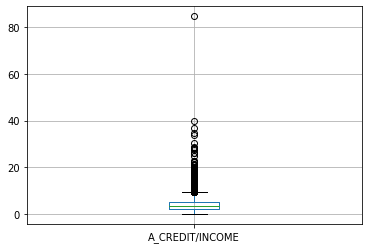

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()

In [11]:
todo = ["A_AMT_INCOME_TOTAL", "A_DAYS_EMPLOYED", "A_YEARS_BEGINEXPLUATATION_AVG", "A_NONLIVINGAREA_AVG", "A_CREDIT/INCOME"]

In [12]:
app_train[todo].head()

,A_AMT_INCOME_TOTAL,A_DAYS_EMPLOYED,A_YEARS_BEGINEXPLUATATION_AVG,A_NONLIVINGAREA_AVG,A_CREDIT/INCOME
SK_ID_CURR,,,,,
100002,202500.0,-637,0.9722,0.0000,2.007889
100003,270000.0,-1188,0.9851,0.0098,4.790750
100004,67500.0,-225,NaN,NaN,2.000000
100006,135000.0,-3039,NaN,NaN,2.316167
100007,121500.0,-3038,NaN,NaN,4.222222


A_AMT_INCOME_TOTAL

In [13]:
head = "A_AMT_INCOME_TOTAL"

In [14]:
print(app_train[head].quantile(1))
print(app_train[head].quantile(0.95))
print(app_train[head].quantile(0.9))

117000000.0
337500.0
270000.0


In [15]:
ID_DROP = app_train[app_train[head] > app_train[head].quantile(0.95)].index.values

In [16]:
app_train.loc[ID_DROP, head] = np.nan

A_DAYS_EMPLOYED

In [17]:
head = "A_DAYS_EMPLOYED"

In [18]:
app_train.loc[:, head] /= 365

In [19]:
print(app_train[head].quantile(1))
print(app_train[head].quantile(0.95))
print(app_train[head].quantile(0.9))

1000.6657534246575
1000.6657534246575
1000.6657534246575


Ein Mensch kann nicht 1000 Jahre arbeiten. Damit werden die unbekannten Arbeitstage von Rentnern und Arbeitslosen dargestellt. Dies muss bereinigt werden.

In [20]:
ID_DROP = app_train[app_train[head] > 100].index.values

In [21]:
app_train.loc[ID_DROP, head] = np.nan

A_YEARS_BEGINEXPLUATATION_AVG

In [22]:
head = "A_YEARS_BEGINEXPLUATATION_AVG"

In [23]:
print(app_train[head].quantile(0))
print(app_train[head].quantile(0.05))
print(app_train[head].quantile(0.1))

0.0
0.9687
0.9722


In [24]:
ID_DROP = app_train[app_train[head] < app_train[head].quantile(0.05)].index.values

In [25]:
app_train.loc[ID_DROP, head] = np.nan

A_NONLIVINGAREA_AVG

In [26]:
head = "A_NONLIVINGAREA_AVG"

In [27]:
print(app_train[head].quantile(1))
print(app_train[head].quantile(0.95))
print(app_train[head].quantile(0.9))

1.0
0.1279
0.0806


In [28]:
ID_DROP = app_train[app_train[head] > app_train[head].quantile(0.95)].index.values

In [29]:
app_train.loc[ID_DROP, head] = np.nan

A_CREDIT/INCOME

In [30]:
head = "A_CREDIT/INCOME"

In [31]:
print(app_train[head].quantile(1))
print(app_train[head].quantile(0.95))
print(app_train[head].quantile(0.9))

84.73684210526315
9.156738636363636
7.4875


In [32]:
ID_DROP = app_train[app_train[head] > app_train[head].quantile(0.95)].index.values

In [33]:
app_train.loc[ID_DROP, head] = np.nan

## Plot Ergebnisse

### A_AMT_INCOME_TOTAL

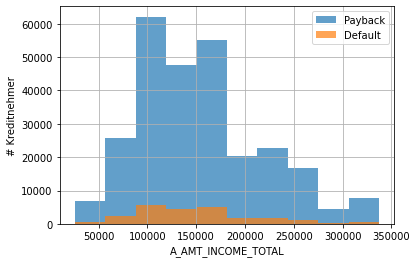

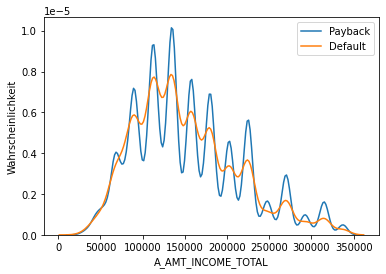

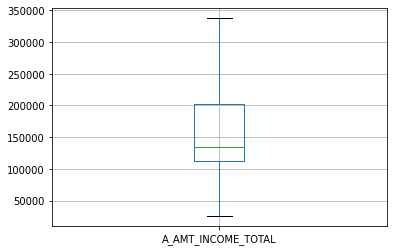

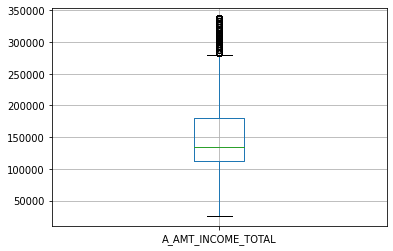

### A_DAYS_EMPLOYED

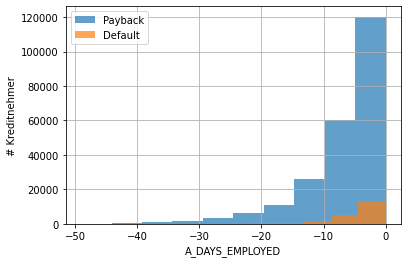

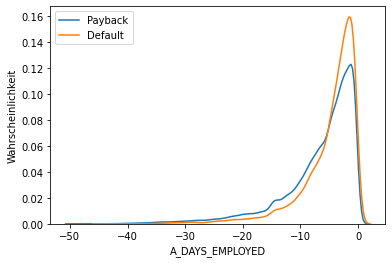

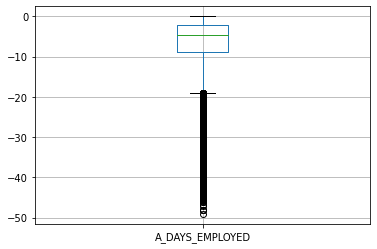

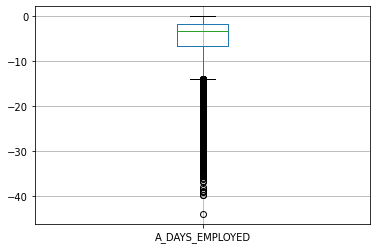

### A_YEARS_BEGINEXPLUATATION_AVG

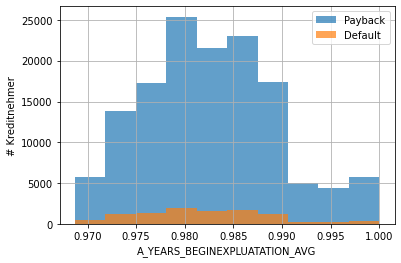

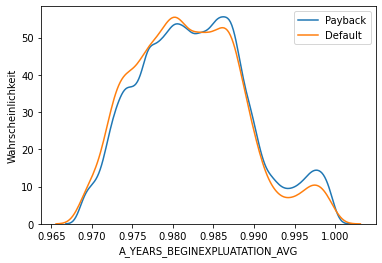

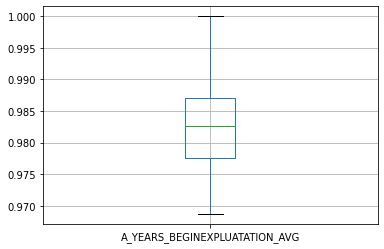

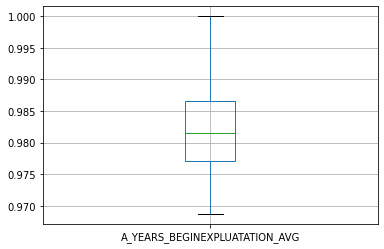

### A_NONLIVINGAREA_AVG

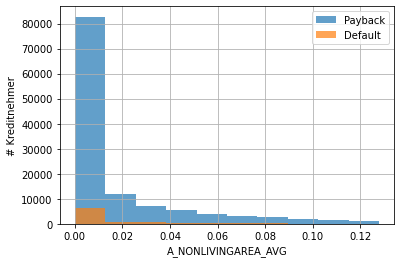

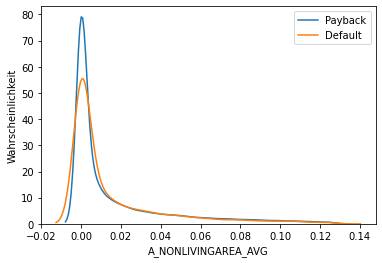

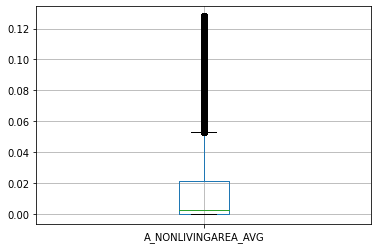

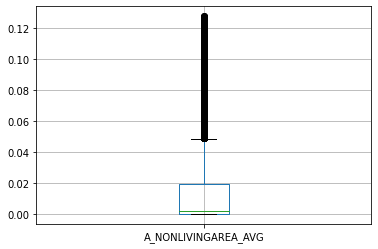

### A_CREDIT/INCOME

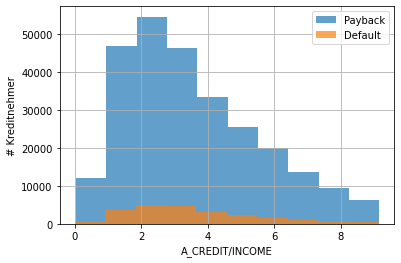

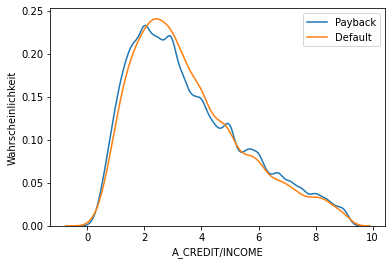

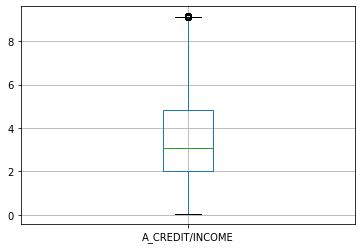

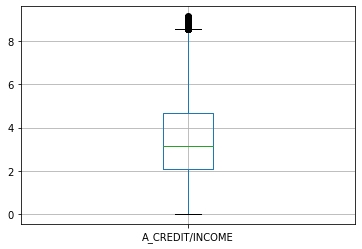

In [34]:
for head in todo:
    display(Markdown("### {head}".format(head=head)))
    
    payback = app_train.loc[ID_Payback]
    default = app_train.loc[ID_Default]

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()
    

In [36]:
app_train.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "app_train.csv")